## Exploratory Data Analysis and Visualization

In [14]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from IPython.display import HTML, display

In [15]:
aviation = pd.read_csv('../Data/AviationFinal.csv')
aviation.head()

EventID WeatherCondition BroadPhaseOfFlight AircraftDamage  \
0  20161117X64217              UNK        MANEUVERING    Substantial   
1  20161116X13203              VMC            LANDING    Substantial   
2  20161116X62135              VMC            TAKEOFF    Substantial   
3  20161114X41943              VMC        MANEUVERING    Substantial   
4  20161116X04207              VMC            UNKNOWN    Substantial   

  InvestigationType PurposeOfFlight AircraftCategory     EngineType  \
0          Accident         Unknown       Helicopter    Turbo Shaft   
1          Accident         Unknown         Airplane        Unknown   
2          Accident        Personal         Airplane  Reciprocating   
3          Accident   Instructional         Airplane  Reciprocating   
4          Accident        Personal         Airplane  Reciprocating   

         Country   Latitude  ...  TotalFatalInjuries TotalSeriousInjuries  \
0    New Zealand  37.703398  ...                 0.0                  0.0   
1         Panama  37.703398  ...                 0.0                  0.0   
2  United States  30.532500  ...                 0.0                  0.0   
3  United States  34.454722  ...                 0.0                  0.0   
4  United States  37.703398  ...                 0.0                  1.0   

   TotalMinorInjuries  TotalUninjured  TotalInjuries  InjurySeverity  \
0                 0.0             1.0            0.0       Non-Fatal   
1                 0.0             2.0            0.0       Non-Fatal   
2                 0.0             1.0            0.0       Non-Fatal   
3                 0.0             2.0            0.0       Non-Fatal   
4                 0.0             1.0            1.0       Non-Fatal   

   NumberOfEngines   EventDate  Month  Year  
0          1.00000  2016-11-14     11  2016  
1          1.14797  2016-11-14     11  2016  
2          1.00000  2016-11-13     11  2016  
3          1.00000  2016-12-11     12  2016  
4          1.00000  2016-12-11     12  2016  

[5 rows x 22 columns]

In [16]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 22 columns):
EventID                 79141 non-null object
WeatherCondition        79141 non-null object
BroadPhaseOfFlight      79141 non-null object
AircraftDamage          79141 non-null object
InvestigationType       79141 non-null object
PurposeOfFlight         79141 non-null object
AircraftCategory        79141 non-null object
EngineType              79141 non-null object
Country                 79141 non-null object
Latitude                79141 non-null float64
Longitude               79141 non-null float64
ReportStatus            79141 non-null object
TotalFatalInjuries      79141 non-null float64
TotalSeriousInjuries    79141 non-null float64
TotalMinorInjuries      79141 non-null float64
TotalUninjured          79141 non-null float64
TotalInjuries           79141 non-null float64
InjurySeverity          79141 non-null object
NumberOfEngines         79141 non-null float64
EventDate

### Count plots for categorical data

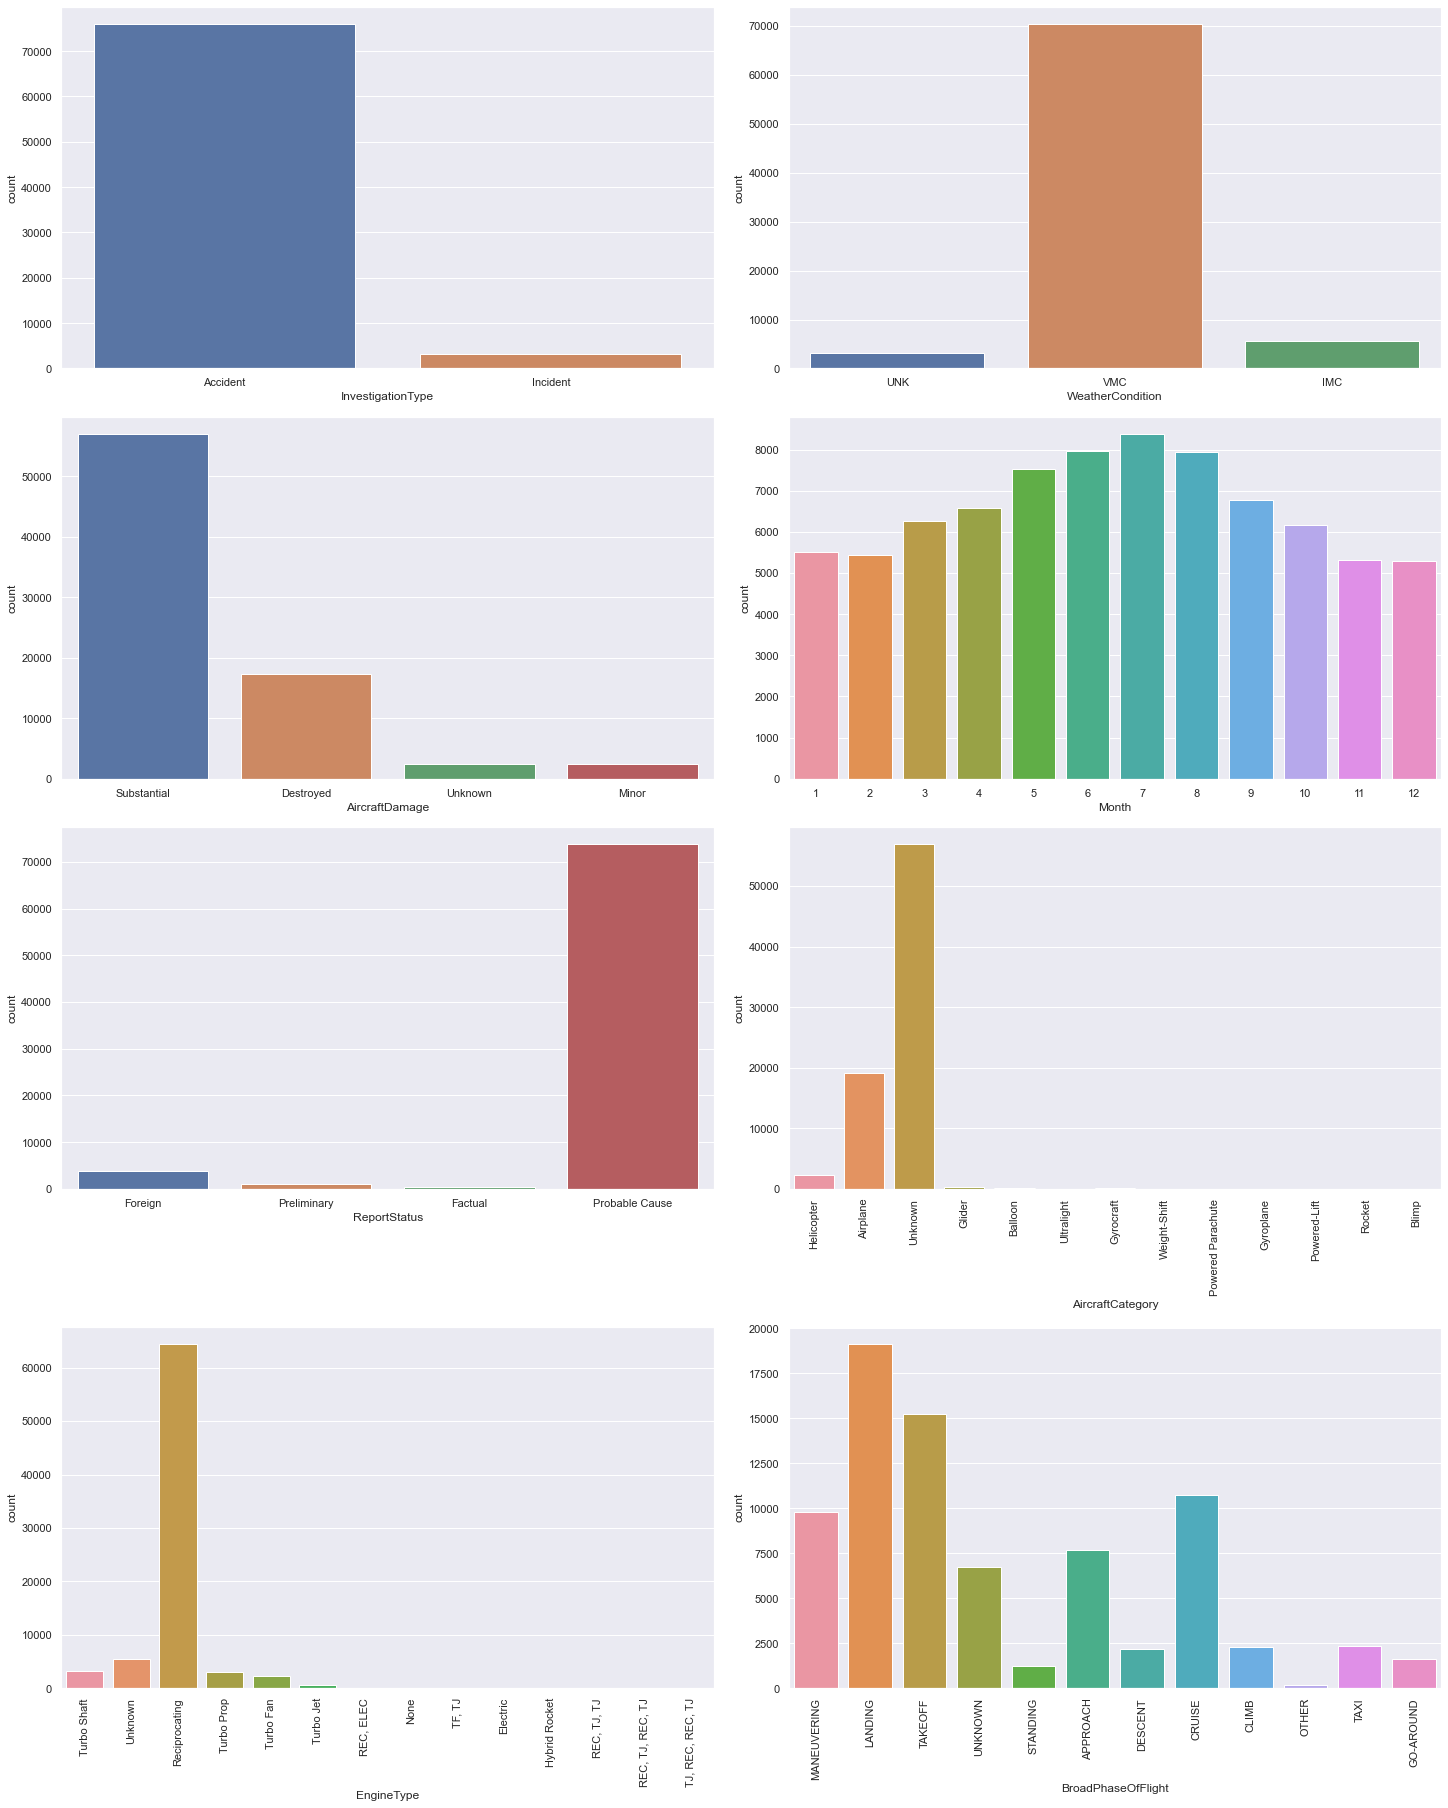

In [17]:
f, axes = plt.subplots(4, 2, figsize=(20,25), constrained_layout=True)

sb.countplot(x='InvestigationType',data=aviation, ax=axes[0,0])
sb.countplot(x='WeatherCondition',data=aviation, ax=axes[0,1])
engine = sb.countplot(x='EngineType',data=aviation, ax=axes[3,0])
engine.set_xticklabels(engine.get_xticklabels(),rotation=90)
phase = sb.countplot(x='BroadPhaseOfFlight',data=aviation, ax=axes[3,1])
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)
sb.countplot(x='AircraftDamage',data=aviation, ax=axes[1,0])
sb.countplot(x='Month',data=aviation, ax=axes[1,1])
aircraftcategory = sb.countplot(x='AircraftCategory',data=aviation, ax=axes[2,1])
aircraftcategory.set_xticklabels(aircraftcategory.get_xticklabels(),rotation=90)
sb.countplot(x='ReportStatus',data=aviation, ax=axes[2,0])

### Strip plots showing Total Injuries by categorical values

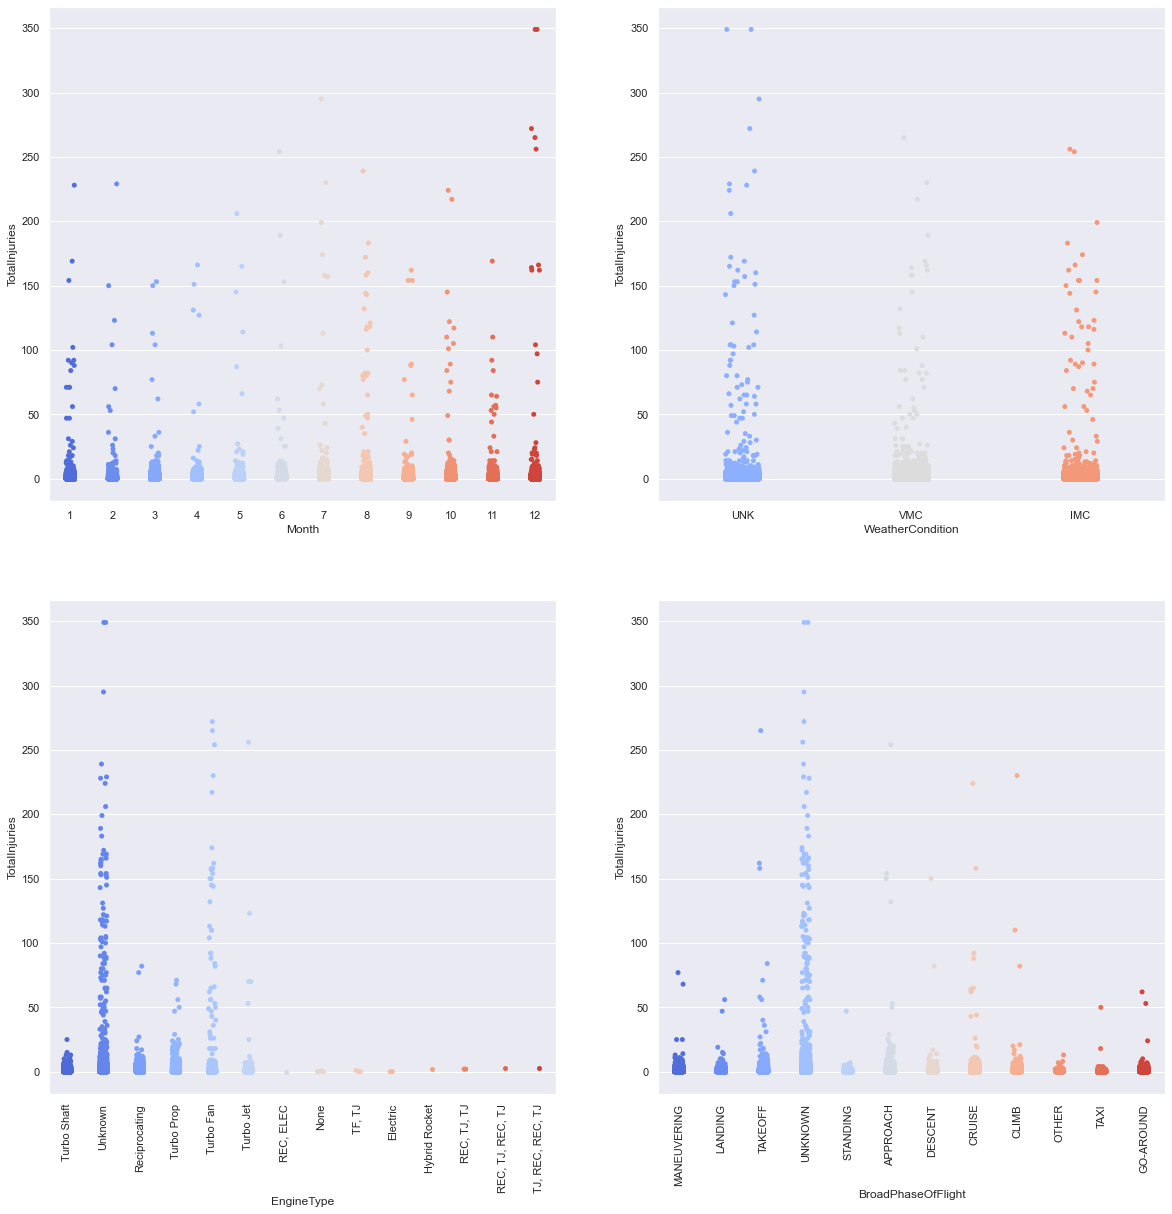

In [18]:
f, axes = plt.subplots(2, 2, figsize=(20,20))
engine = sb.stripplot(x="EngineType",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[1,0])
engine.set_xticklabels(engine.get_xticklabels(),rotation=90)
phase = sb.stripplot(x="BroadPhaseOfFlight",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[1,1])
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)
sb.stripplot(x="Month",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[0,0])
sb.stripplot(x="WeatherCondition",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[0,1])

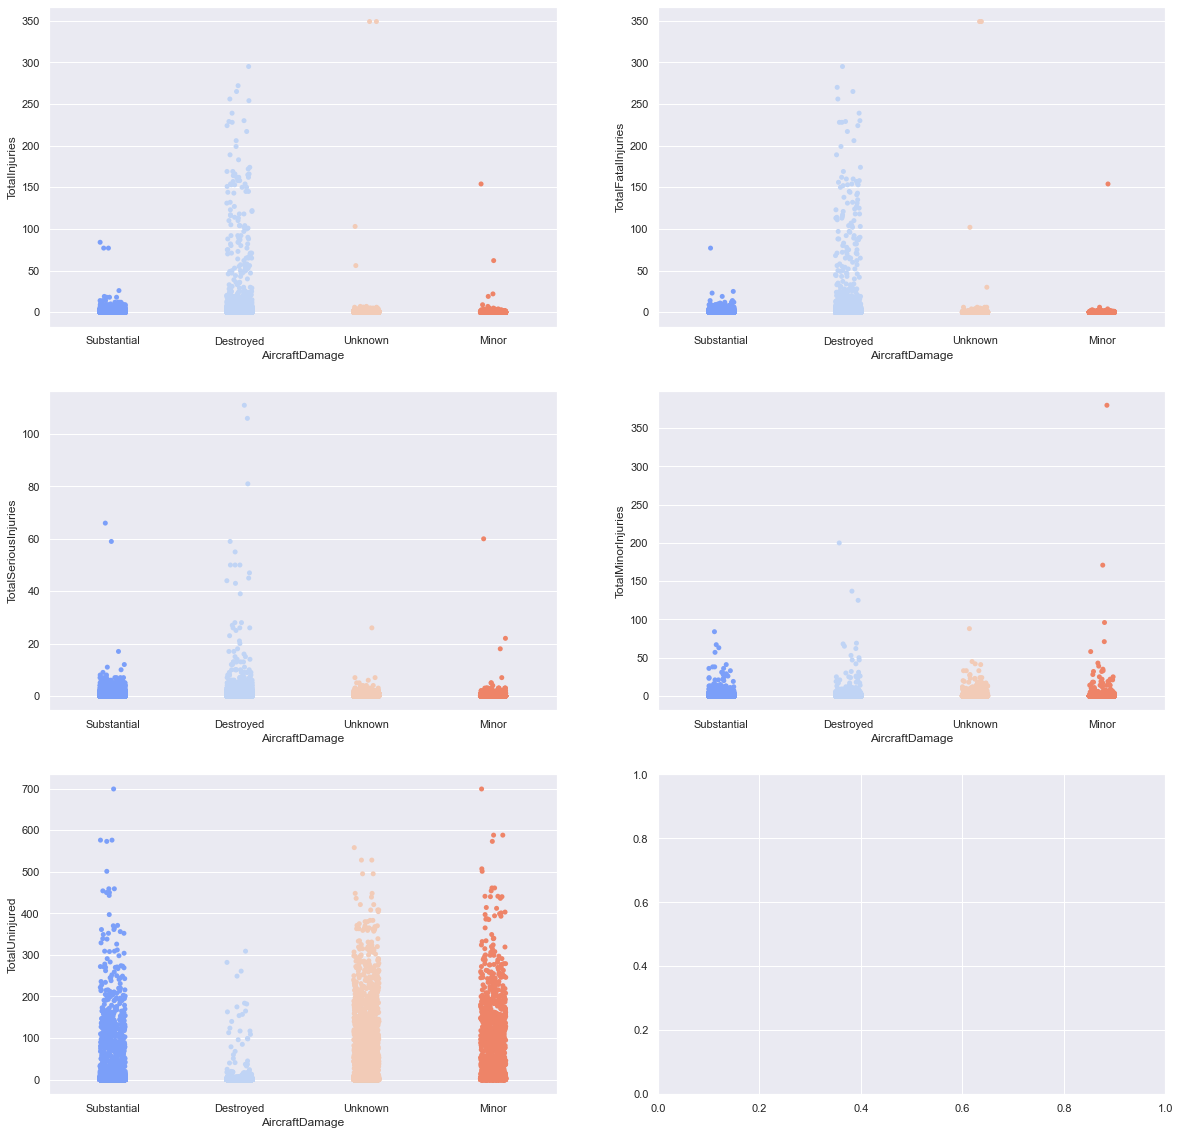

In [19]:
f, axes = plt.subplots(3, 2, figsize=(20,20))

sb.stripplot(x="AircraftDamage",y="TotalInjuries", data=aviation, palette="coolwarm", ax=axes[0,0])
sb.stripplot(x="AircraftDamage",y="TotalFatalInjuries", data=aviation, palette="coolwarm", ax=axes[0,1])
sb.stripplot(x="AircraftDamage",y="TotalSeriousInjuries", data=aviation, palette="coolwarm", ax=axes[1,0])
sb.stripplot(x="AircraftDamage",y="TotalMinorInjuries", data=aviation, palette="coolwarm", ax=axes[1,1])
sb.stripplot(x="AircraftDamage",y="TotalUninjured", data=aviation, palette="coolwarm", ax=axes[2,0])

### Strip plots showing total injuries based on time and aircraft damage

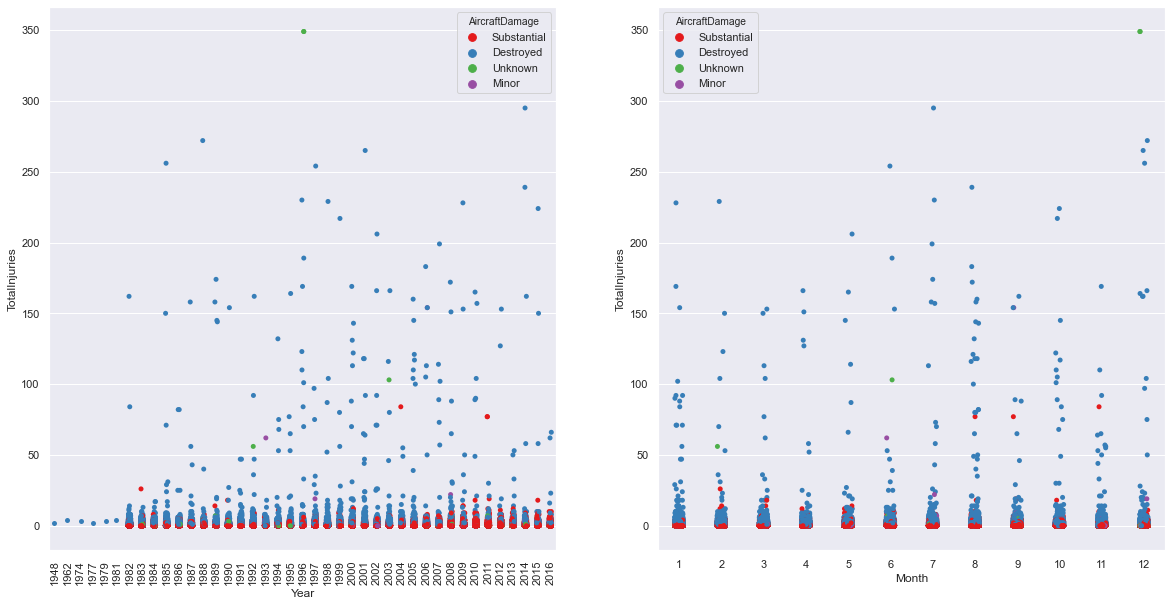

In [20]:
f, axes = plt.subplots(1, 2, figsize=(20,10))

year = sb.stripplot(x="Year",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1', ax=axes[0])
year.set_xticklabels(year.get_xticklabels(),rotation=90)
sb.stripplot(x="Month",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1', ax=axes[1])

### Strip plot showing total injuries based on aircraft damage and phase of flight

[Text(0, 0, 'MANEUVERING'),
 Text(0, 0, 'LANDING'),
 Text(0, 0, 'TAKEOFF'),
 Text(0, 0, 'UNKNOWN'),
 Text(0, 0, 'STANDING'),
 Text(0, 0, 'APPROACH'),
 Text(0, 0, 'DESCENT'),
 Text(0, 0, 'CRUISE'),
 Text(0, 0, 'CLIMB'),
 Text(0, 0, 'OTHER'),
 Text(0, 0, 'TAXI'),
 Text(0, 0, 'GO-AROUND')]

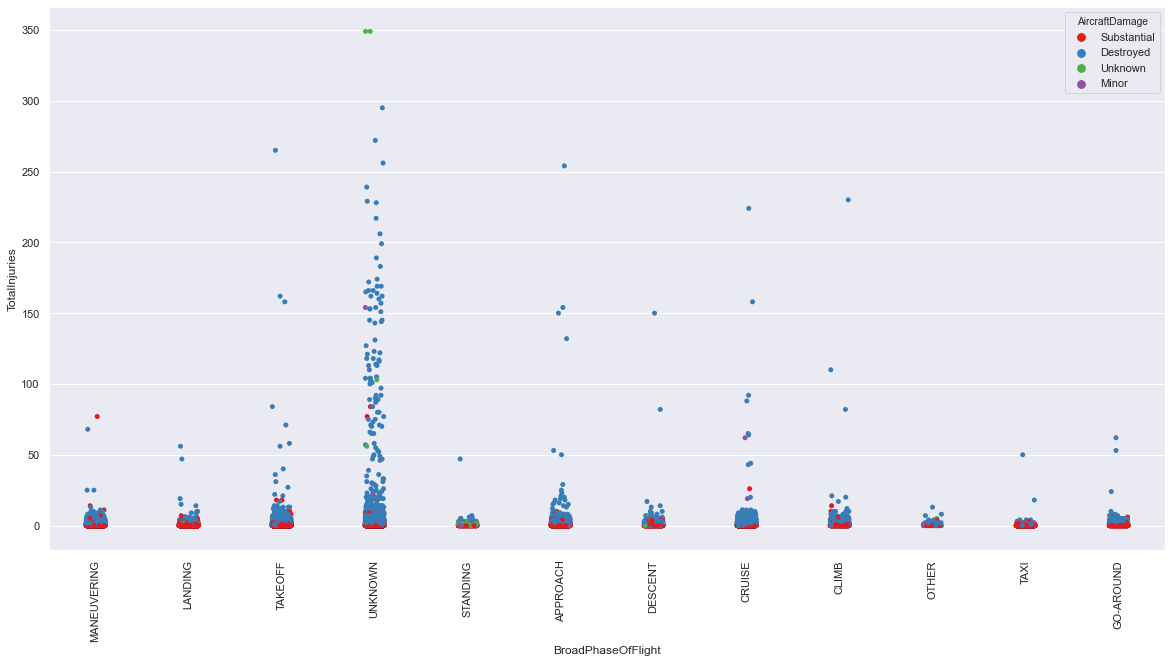

In [21]:
fig = plt.figure(figsize = (20,10))
phase = sb.stripplot(x="BroadPhaseOfFlight",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1')
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)

### Line plots showing total injuries over time

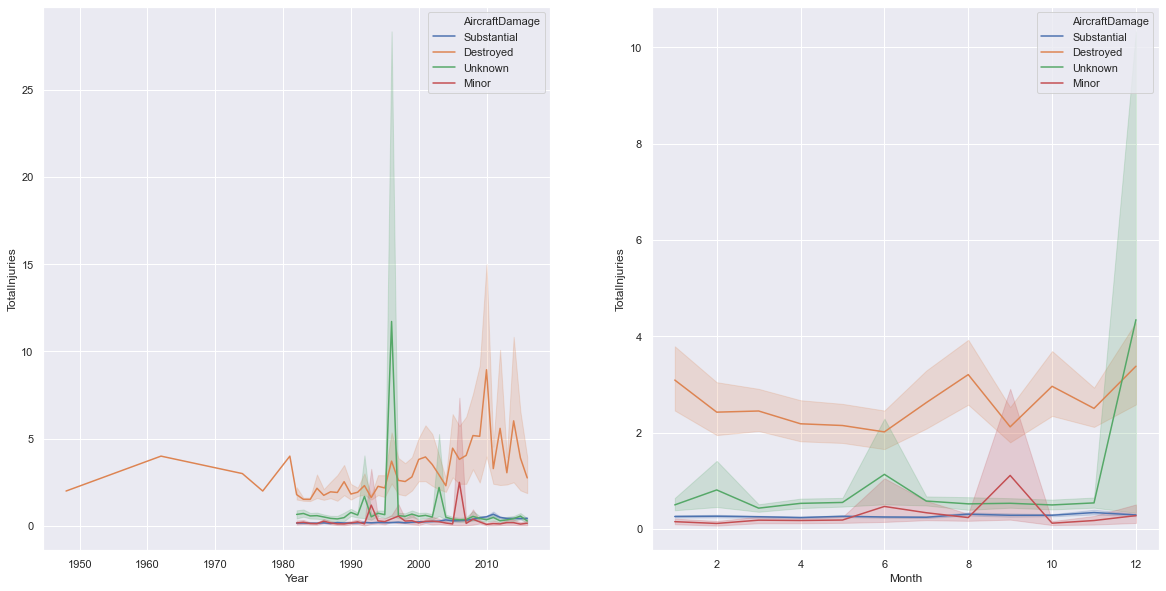

In [22]:
f, axes = plt.subplots(1, 2, figsize=(20,10))

sb.lineplot(x="Month", y="TotalInjuries",hue="AircraftDamage", data=aviation, ax=axes[1])
sb.lineplot(x="Year", y="TotalInjuries",hue="AircraftDamage", data=aviation, ax=axes[0])

### Line plot showing total accidents over time

Text(0.5, 1.0, 'Accident per Year')

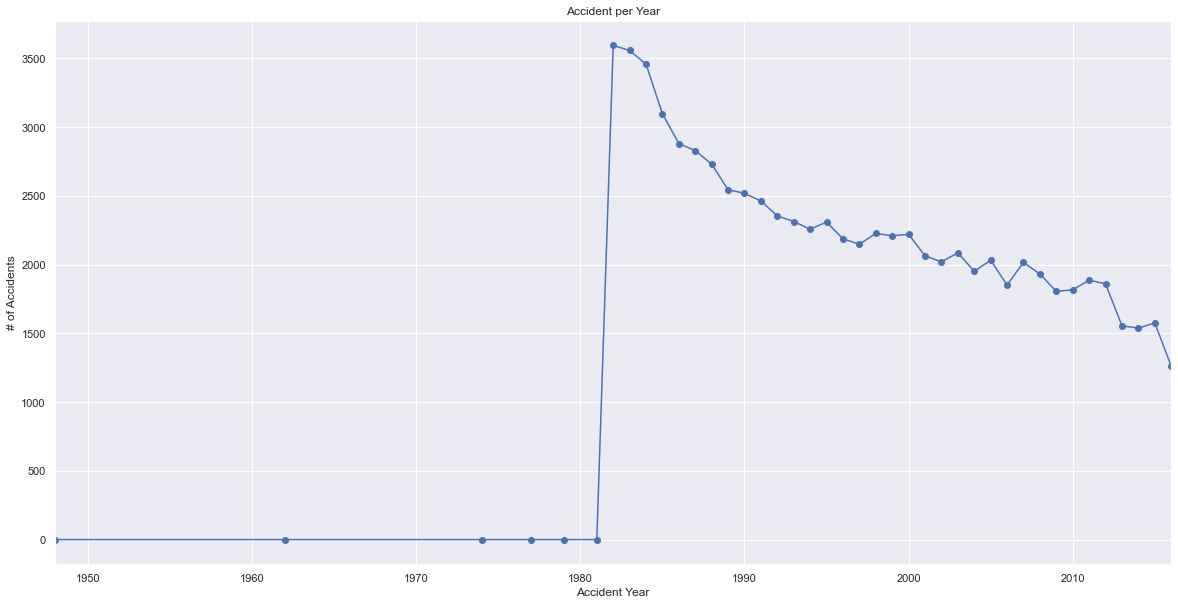

In [23]:
accidents_per_year = aviation.groupby('Year').size()
fig = plt.figure(figsize = (20,10))
subplot = fig.add_subplot(1,1,1)
accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('# of Accidents')
subplot.set_title('Accident per Year')

### Grouping investigation types with weather conditions

In [24]:
pd.DataFrame(aviation.groupby(['WeatherCondition', 'InvestigationType']).size())

0
WeatherCondition InvestigationType       
IMC              Accident            5412
                 Incident             243
UNK              Accident            2274
                 Incident             822
VMC              Accident           68295
                 Incident            2095

### Grouping investigation types with engine types

In [25]:
pd.DataFrame(aviation.groupby(['EngineType', 'InvestigationType']).size())

0
EngineType       InvestigationType       
Electric         Accident               2
Hybrid Rocket    Accident               1
None             Accident               6
REC, ELEC        Accident               1
REC, TJ, REC, TJ Accident               1
REC, TJ, TJ      Accident               2
Reciprocating    Accident           63872
                 Incident             608
TF, TJ           Accident               3
TJ, REC, REC, TJ Accident               1
Turbo Fan        Accident            1230
                 Incident             990
Turbo Jet        Accident             440
                 Incident             238
Turbo Prop       Accident            2606
                 Incident             423
Turbo Shaft      Accident            3186
                 Incident             118
Unknown          Accident            4630
                 Incident             783

### Grouping investigation type, weather condition by engine type

In [26]:
pd.DataFrame(aviation.groupby(['EngineType', 'WeatherCondition', 'InvestigationType']).size())

0
EngineType       WeatherCondition InvestigationType       
Electric         VMC              Accident               2
Hybrid Rocket    VMC              Accident               1
None             VMC              Accident               6
REC, ELEC        VMC              Accident               1
REC, TJ, REC, TJ IMC              Accident               1
REC, TJ, TJ      IMC              Accident               1
                 VMC              Accident               1
Reciprocating    IMC              Accident            4217
                                  Incident              24
                 UNK              Accident             827
                                  Incident              12
                 VMC              Accident           58828
                                  Incident             572
TF, TJ           UNK              Accident               1
                 VMC              Accident               2
TJ, REC, REC, TJ VMC              Accident               1
Turbo Fan        IMC              Accident             222
                                  Incident             107
                 UNK              Accident              80
                                  Incident             173
                 VMC              Accident             928
                                  Incident             710
Turbo Jet        IMC              Accident              72
                                  Incident              36
                 UNK              Accident              19
                                  Incident              10
                 VMC              Accident             349
                                  Incident             192
Turbo Prop       IMC              Accident             433
                                  Incident              52
                 UNK              Accident              68
                                  Incident              28
                 VMC              Accident            2105
                                  Incident             343
Turbo Shaft      IMC              Accident             217
                                  Incident               3
                 UNK              Accident              86
                                  Incident               8
                 VMC              Accident            2883
                                  Incident             107
Unknown          IMC              Accident             249
                                  Incident              21
                 UNK              Accident            1193
                                  Incident             591
                 VMC              Accident            3188
                                  Incident             171

### Piechart for report status

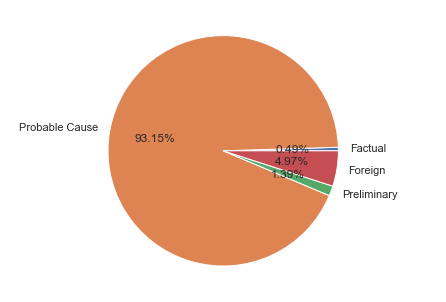

In [27]:
countNoFactual = len(aviation[aviation.ReportStatus == 'Factual'])
countNoProbable = len(aviation[aviation.ReportStatus == 'Probable Cause'])
countNoPreliminary = len(aviation[aviation.ReportStatus == 'Preliminary'])
countNoForeign = len(aviation[aviation.ReportStatus == 'Foreign'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Factual', 'Probable Cause', 'Preliminary', 'Foreign']
students = [countNoFactual, countNoProbable, countNoPreliminary, countNoForeign]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

### Pie chart for engine types
>  Observation: Most Engine Type is reciprocating

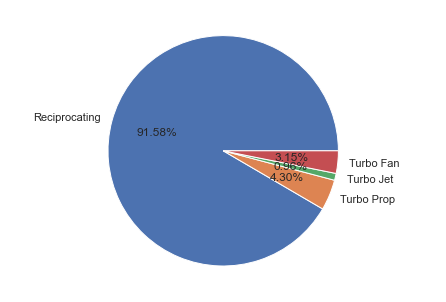

In [28]:
countNoReciprocating = len(aviation[aviation.EngineType == 'Reciprocating'])
countNoTurbo_Prop = len(aviation[aviation.EngineType == 'Turbo Prop'])
countNoTurbo_Jet = len(aviation[aviation.EngineType == 'Turbo Jet'])
countNoTurbo_Fan = len(aviation[aviation.EngineType == 'Turbo Fan'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Reciprocating', 'Turbo Prop', 'Turbo Jet', 'Turbo Fan']
students = [countNoReciprocating,countNoTurbo_Prop , countNoTurbo_Jet, countNoTurbo_Fan]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

### Map to see total accidents by location

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


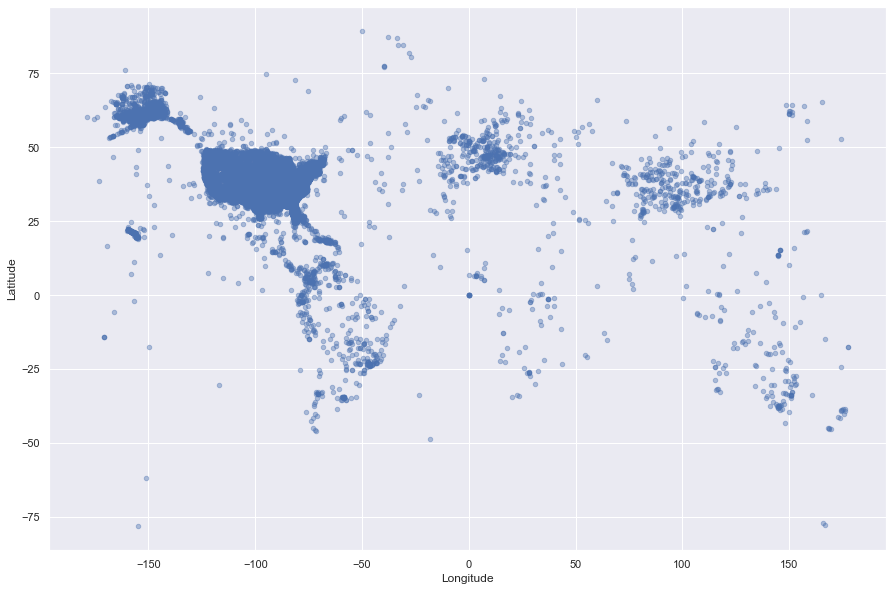

In [29]:
aviation.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(15,10))
plt.show()

### Map to see the total fatal injuries by location

In [30]:
m = folium.Map(location=[30, 20], zoom_start=3)

m.add_child(HeatMap(zip(aviation['Latitude'],
                           aviation['Longitude'], 
                           aviation['TotalFatalInjuries']),
                           min_opacity = 0.2))

FastMarkerCluster(data=list(zip(aviation['Latitude'].values, aviation['Longitude'].values))).add_to(m)
folium.LayerControl().add_to(m)

display(m)